In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Загружаем данные

In [2]:
data = pd.read_csv('../data/raw/heart_cleveland_upload.csv')

- age: возраст в годах
- sex: пол (1 = мужчина; 0 = женщина)
- cp: тип боли в груди

    -- Значение 0: типичная стенокардия

    -- Значение 1: атипичная стенокардия
    
    -- Значение 2: неангинозная боль
    
    -- Значение 3: бессимптомная
- trestbps: артериальное давление в покое (в мм рт. ст. при поступлении в больницу)
- chol: холестерин в сыворотке в мг/дл
- fbs: (уровень сахара в крови натощак > 120 мг/дл) (1 = верно; 0 = неверно)
- restecg: результаты электрокардиографии в состоянии покоя

    -- Значение 0: нормальное

    -- Значение 1: наличие аномалии ST-T (инверсия зубца T и/или элевация или депрессия ST > 0,05 мВ)

    -- Значение 2: указание на возможную или определенную гипертрофию левого желудочка по критериям Эстеса
- thalach: достигнута максимальная частота сердечных сокращений
- exang: стенокардия, вызванная физической нагрузкой (1 = да; 0 = нет)
- oldpeak = ST, вызванная физической нагрузкой, по сравнению с состоянием покоя
- slope: наклон сегмента ST пикового упражнения

    -- Значение 0: восходящий

    -- Значение 1: плоский

    -- Значение 2: нисходящий
- ca: количество крупных сосудов (0-3), окрашенных при флюороскопии
- thal: 0 = нормальный; 1 = фиксированный дефект; 2 = обратимый дефект
- condition: 0 = нет болезни, 1 = болезнь

In [3]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,40,1,3,152,223,0,0,181,0,0.0,0,0,2,1
293,39,1,3,118,219,0,0,140,0,1.2,1,0,2,1
294,35,1,3,120,198,0,0,130,1,1.6,1,0,2,1
295,35,0,3,138,183,0,0,182,0,1.4,0,0,0,0


### Среди типов данных нет текстовых

In [33]:
data.dtypes

age            int64
sex            int64
cp             int64
trestbps       int64
chol           int64
fbs            int64
restecg        int64
thalach        int64
exang          int64
oldpeak      float64
slope          int64
ca             int64
thal           int64
condition      int64
dtype: object

### Посмотрим на коррелцию между фичами, больше всего наша целевая фича condition(наличие болезни) зависит от thal (типа дефекта)

<AxesSubplot:>

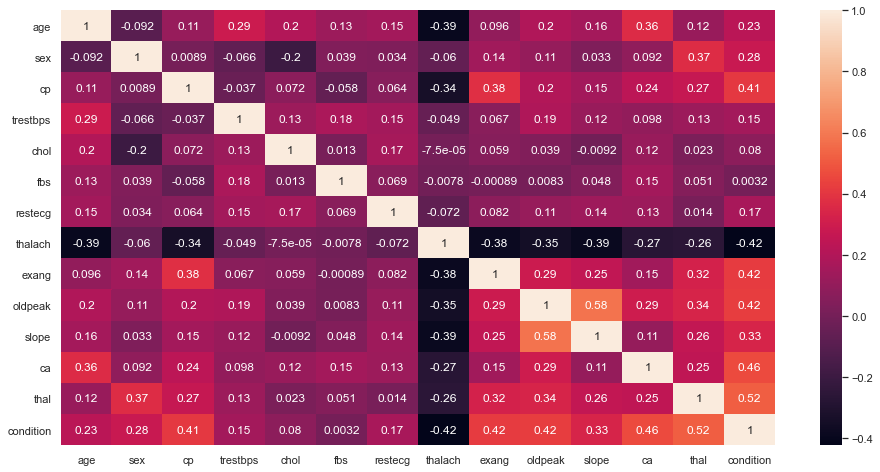

In [93]:
sns.set(rc = {'figure.figsize':(16,8)})
sns.heatmap(data.corr(), annot=True)

### Визуализируем данные с помощью метода понижения размерности

In [7]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [24]:
X = data.drop(['condition'], axis=1)
y = data.condition

In [25]:
pca = PCA()
pca.fit(X)
X_pca = pca.fit_transform(X)

for i in range(X_pca.shape[1] - 1):
    pca.fit(X_pca)
    X_pca = pca.fit_transform(X_pca)

### Алргоритм PCA - явно разделительную кривую построить нельзя, данные распределены нелинейно 

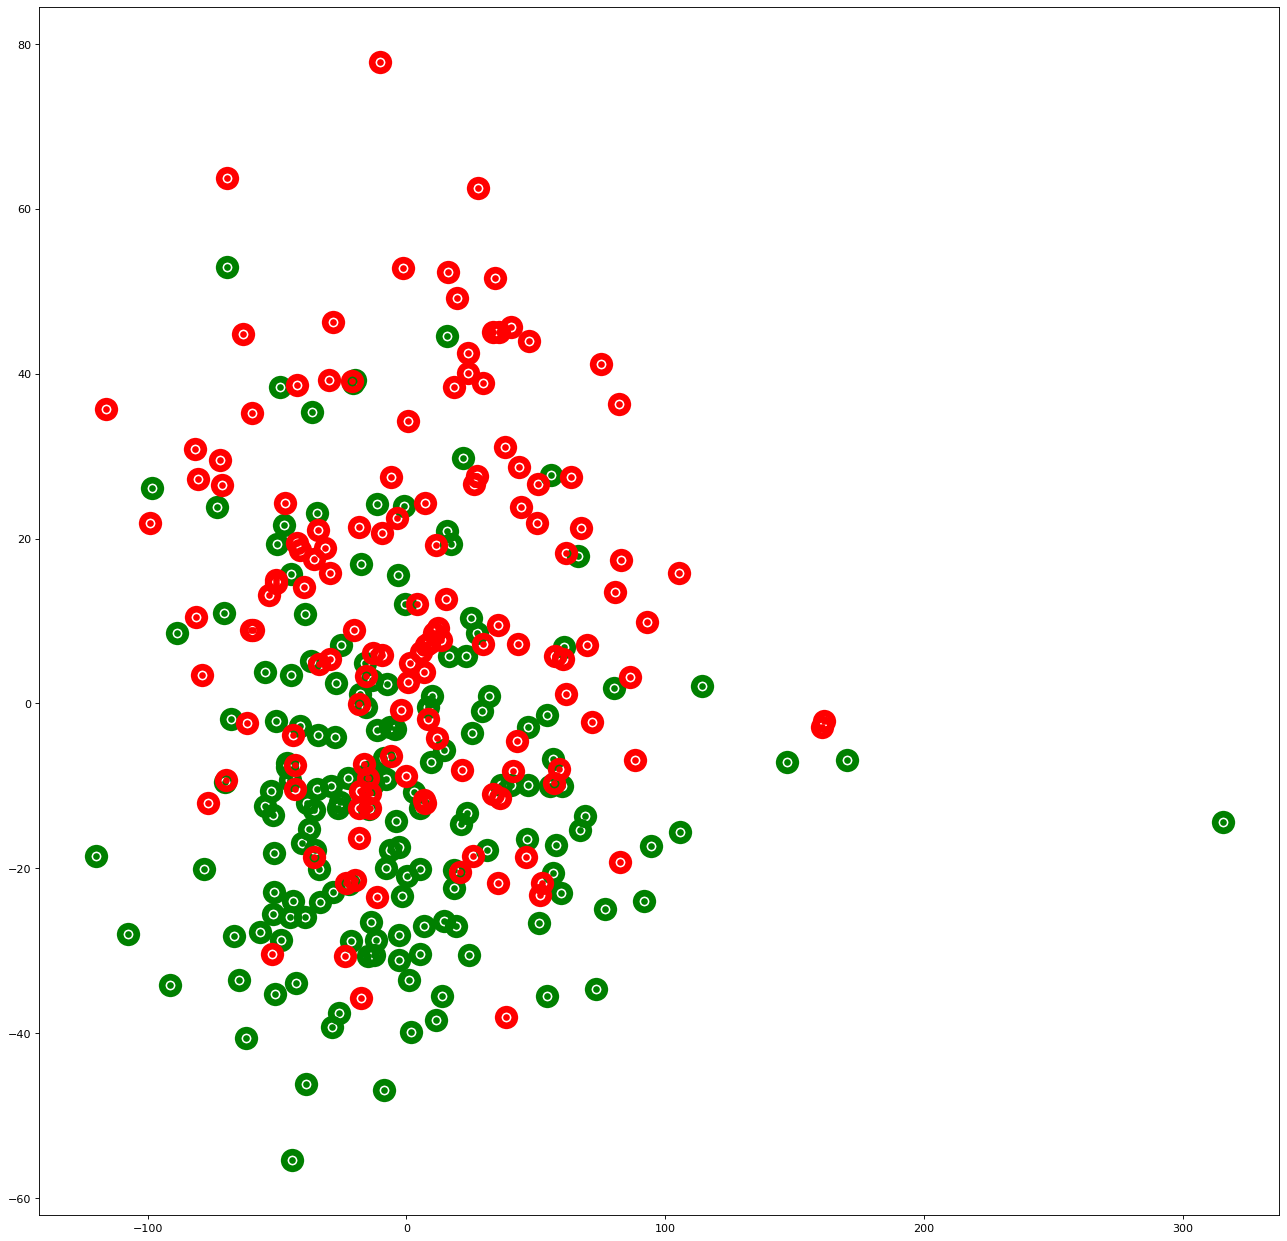

In [28]:
plt.figure(figsize=(20, 20), dpi=80)

plt.scatter(X_pca[:, 0][y == 0], X_pca[:, 1][y == 0], linewidths = 15, c = 'green')
plt.scatter(X_pca[:, 0][y == 1], X_pca[:, 1][y == 1], linewidths = 15, c = 'red')

In [29]:
tsne = TSNE(n_components=2)
tsne.fit(X)
X_pca = tsne.fit_transform(X)

### Алгоритм TSNE - с помощью данного алгоритма данные проще отделить, зеленые метки(здоровые) находятся ближе к центру, отсюда можно сделать вывод, что болезни связаны с высокими, либо низкими показателями некоторых признаков (например слишком высокая, либо низкая частота сердечных сокращений) 

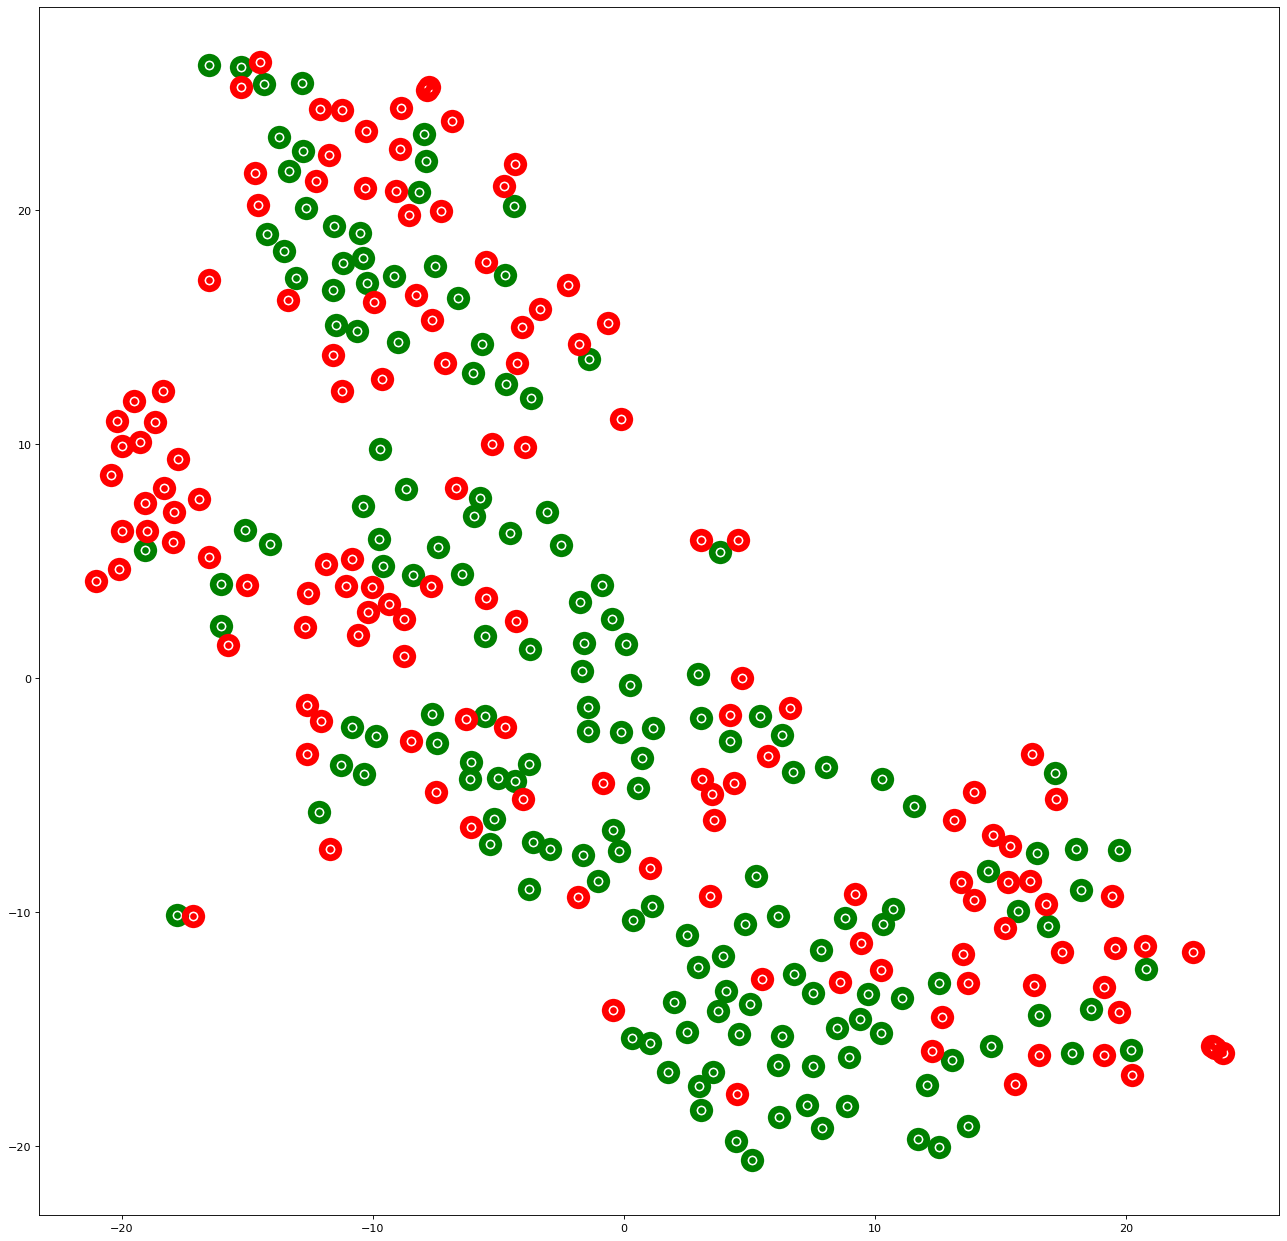

In [30]:
plt.figure(figsize=(20, 20), dpi=80)

plt.scatter(X_pca[:, 0][y == 0], X_pca[:, 1][y == 0], linewidths = 15, c = 'green')
plt.scatter(X_pca[:, 0][y == 1], X_pca[:, 1][y == 1], linewidths = 15, c = 'red')

### Проверим данные на заполненность - можно увидеть, что Nan в них нет 

In [36]:
data.isna().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

### Оценим распределение численных фич - возраст, холестерирн распределены нормально, остальные фичи - тоже, но с некоторым смещением

Text(0.5, 1.0, 'thalach')

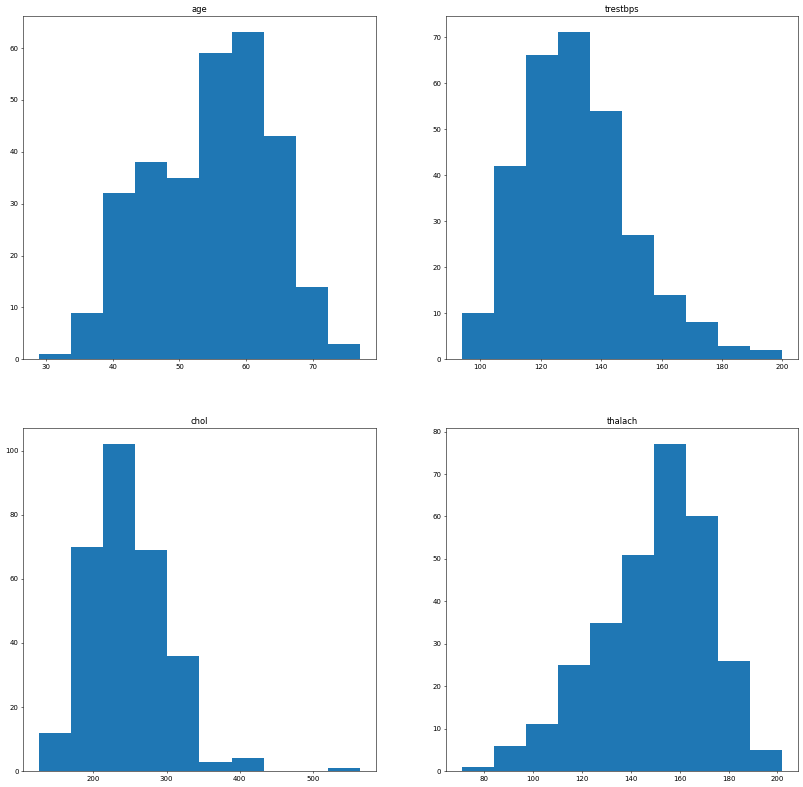

In [81]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 20), dpi=50)
ax1.hist(data.age)
ax1.set_title("age")
ax2.hist(data.trestbps)
ax2.set_title("trestbps")
ax3.hist(data.chol)
ax3.set_title("chol")
ax4.hist(data.thalach)
ax4.set_title("thalach")

### Также оценим распределение категориальных фич - равномерного распределения почти нигде нет

Text(0.5, 1.0, 'restecg')

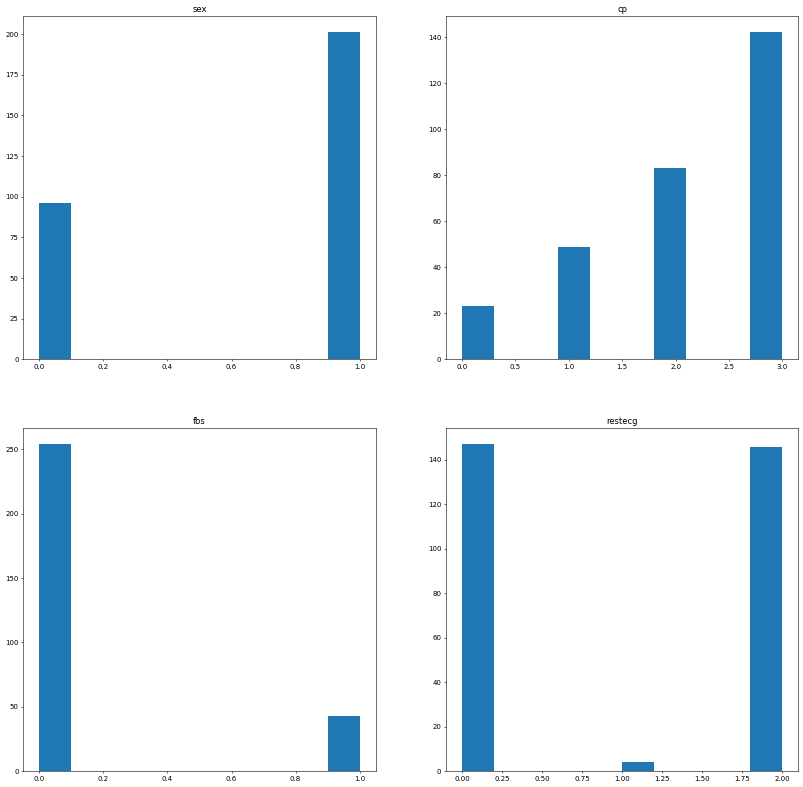

In [82]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 20), dpi=50)
ax1.hist(data.sex)
ax1.set_title("sex")
ax2.hist(data.cp)
ax2.set_title("cp")
ax3.hist(data.fbs)
ax3.set_title("fbs")
ax4.hist(data.restecg)
ax4.set_title("restecg")

### Только признак наличия болезни распределён равномерно

Text(0.5, 1.0, 'condition')

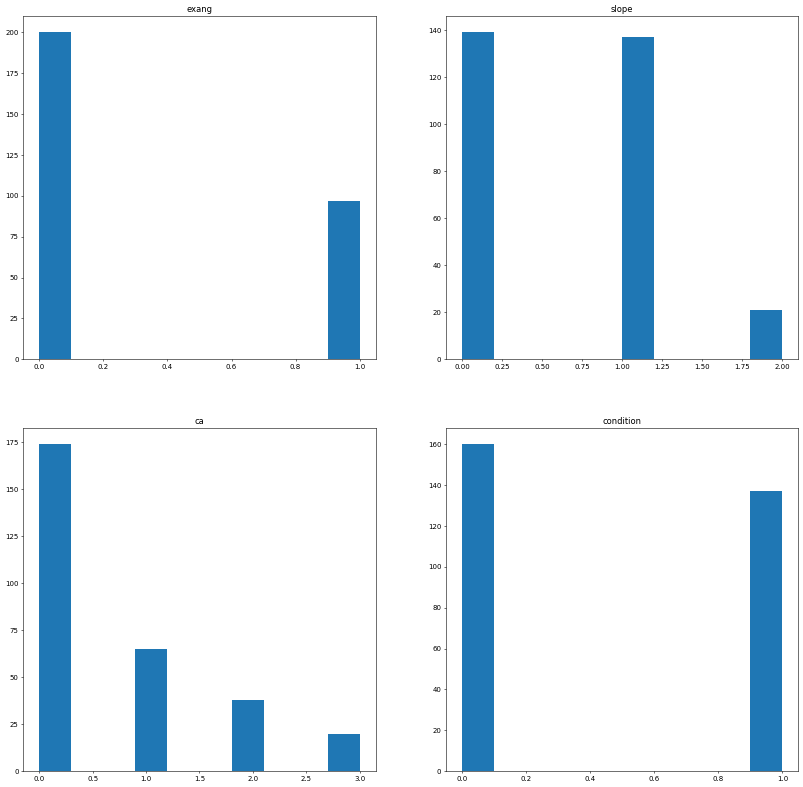

In [84]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 20), dpi=50)
ax1.hist(data.exang)
ax1.set_title("exang")
ax2.hist(data.slope)
ax2.set_title("slope")
ax3.hist(data.ca)
ax3.set_title("ca")
ax4.hist(data.condition)
ax4.set_title("condition")